In [144]:
import pandas as pd
import geopandas as gpd
import laspy
import open3d as o3d
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [174]:
# Wczytywanie pliku LAS
las = laspy.read(r'C:\Users\sturz\Downloads\2019_06_04_gorzow_wlkp.laz')

# Filtracja punktów, które należą do klas roślinności
# Zakładamy, że klasy 3, 4, i 5 odpowiadają roślinności
vegetation_points = las.points[(las.classification == 3) |
                               (las.classification == 4) |
                               (las.classification == 5)]

# Przygotowanie nowego obiektu LasData z wyfiltrowanymi punktami
new_las = laspy.LasData(las.header)
new_las.points = vegetation_points
# new_las.write(r"C:\Users\sturz\Downloads\roslinnosc_rondo_dmowskiego.laz")

## Analiza RGB kafelka

Zakres czerwony: (0, 65280)
Zakres zielony: (3328, 65280)
Zakres niebieski: (0, 65280)
Zakres intensity: (45, 4732)
Wartości RGB są w formacie 16-bitowym.


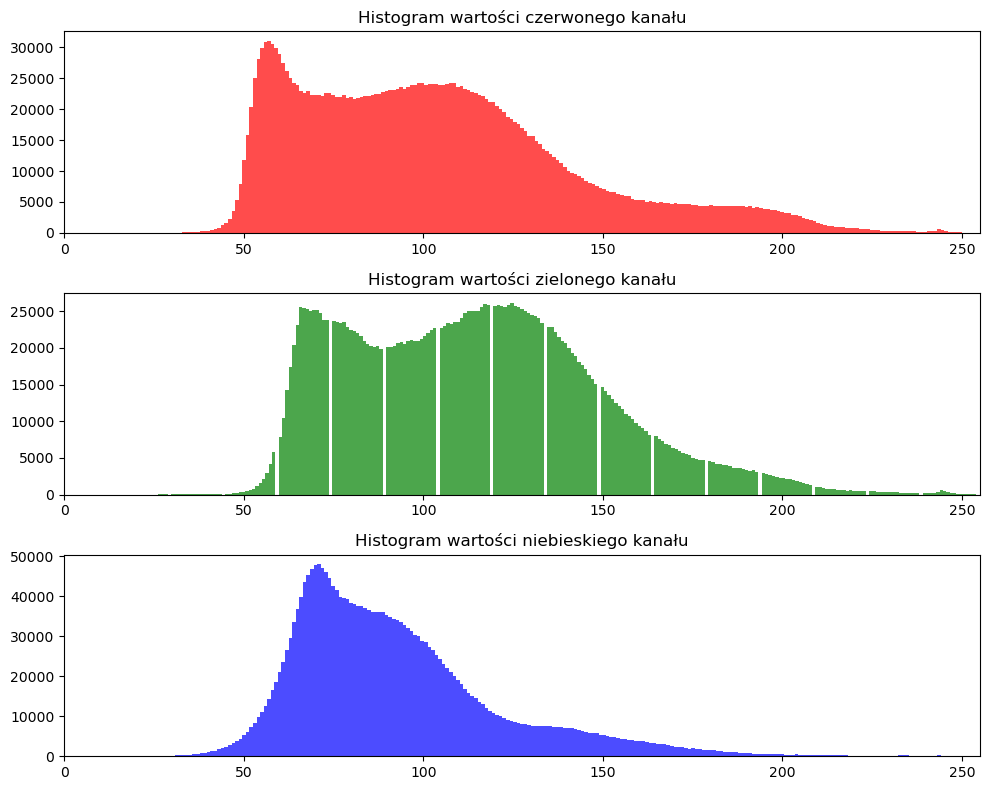

In [175]:
# Tutaj można przeprowadzić analizę RGB
# Przykład wyodrębnienia wartości RGB
red = new_las.red
green = new_las.green
blue = new_las.blue
intensity = new_las.intensity

# Sprawdzanie zakresu wartości RGB
red_range = (las.red.min(), las.red.max())
green_range = (las.green.min(), las.green.max())
blue_range = (las.blue.min(), las.blue.max())
intensity_range = (las.intensity.min(), las.intensity.max())

print(f"Zakres czerwony: {red_range}")
print(f"Zakres zielony: {green_range}")
print(f"Zakres niebieski: {blue_range}")
print(f"Zakres intensity: {intensity_range}")


# Interpretacja zakresu
if red_range[1] > 255 or green_range[1] > 255 or blue_range[1] > 255:
    print("Wartości RGB są w formacie 16-bitowym.")
else:
    print("Wartości RGB są w formacie 8-bitowym.")

# Normalizacja wartości RGB (jeśli są to wartości 16-bitowe)
# W przypadku wartości 8-bitowych krok normalizacji można pominąć
red = red / 65535 * 255
green = green / 65535 * 255
blue = blue / 65535 * 255

# Tworzenie histogramów dla kanałów RGB
plt.figure(figsize=(10, 8))

# Histogram dla kanału czerwonego
plt.subplot(3, 1, 1)  # 3 wiersze, 1 kolumna, indeks 1
plt.hist(red, bins=256, color='red', alpha=0.7)
plt.title('Histogram wartości czerwonego kanału')
plt.xlim([0, 255])

# Histogram dla kanału zielonego
plt.subplot(3, 1, 2)  # 3 wiersze, 1 kolumna, indeks 2
plt.hist(green, bins=256, color='green', alpha=0.7)
plt.title('Histogram wartości zielonego kanału')
plt.xlim([0, 255])

# Histogram dla kanału niebieskiego
plt.subplot(3, 1, 3)  # 3 wiersze, 1 kolumna, indeks 3
plt.hist(blue, bins=256, color='blue', alpha=0.7)
plt.title('Histogram wartości niebieskiego kanału')
plt.xlim([0, 255])

plt.tight_layout()
plt.show()

### wykres w matplotlib

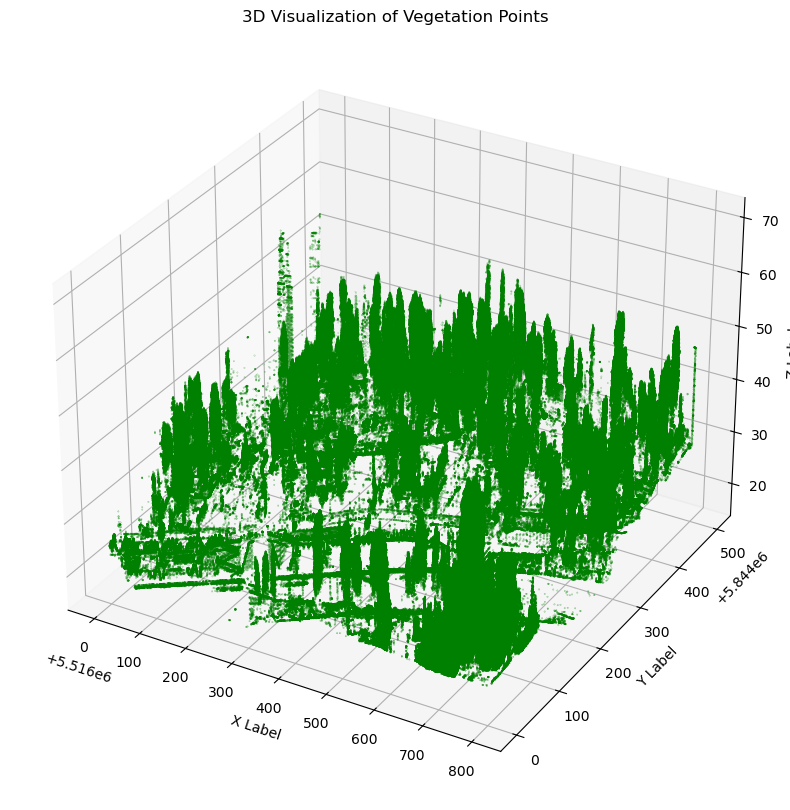

In [176]:

# Przygotowanie danych do wyświetlenia
x = new_las.x
y = new_las.y
z = new_las.z

# Konfiguracja wykresu 3D
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Wyświetlanie chmury punktów
scatter = ax.scatter(x, y, z, c='green', marker='.', s=0.2)

# Ustawienia etykiet osi i tytułu
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.set_title('3D Visualization of Vegetation Points')

# Pokazanie wykresu
plt.show()

### wizualizacja w open3d

In [177]:

# Konwersja punktów laspy na format numpy
points = np.vstack((new_las.x, new_las.y, new_las.z)).transpose()
colors = np.vstack((new_las.red, new_las.green, new_las.blue)).transpose()

# Normalizacja wartości RGB jeśli są one w formacie 16-bitowym
colors = colors / 65535

# Utworzenie chmury punktów Open3D
pcd = o3d.geometry.PointCloud()
pcd.points = o3d.utility.Vector3dVector(points)
pcd.colors = o3d.utility.Vector3dVector(colors)

# Wizualizacja chmury punktów
o3d.visualization.draw_geometries([pcd], window_name="Chmura punktów roślinności")

[Open3D WARNING] GLFW Error: WGL: Failed to make context current: Nieprawidłowe dojście. 


C:\Users\sturz\AppData\Local\Temp\ipykernel_23928\906089422.py:24: RuntimeWarning: divide by zero encountered in divide
  ndvi=(new_las.intensity - new_las.red)/(new_las.intensity+new_las.red)


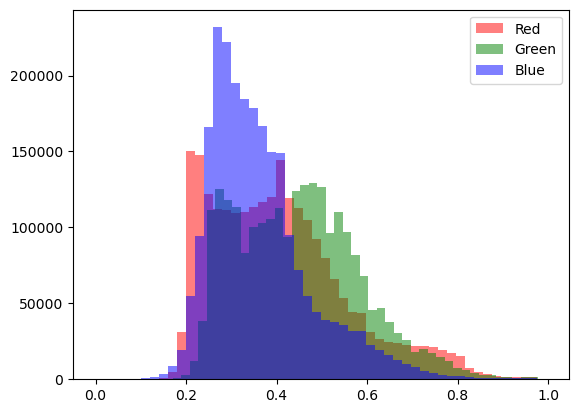

In [181]:
# Wczytywanie pliku LAS
las = laspy.read(r'C:\Users\sturz\Downloads\2019_06_04_gorzow_wlkp.laz')

# Filtracja punktów, które należą do klas roślinności
vegetation_indices = (las.classification == 3) | (las.classification == 4) | (las.classification == 5)
vegetation_points = las.points[vegetation_indices]

# Przygotowanie nowego obiektu LasData z wyfiltrowanymi punktami
new_las = laspy.LasData(las.header)
new_las.points = vegetation_points

# Konwersja punktów laspy na format numpy
points = np.vstack((new_las.x, new_las.y, new_las.z)).transpose()

# Normalizacja wartości RGB
colors = np.vstack((new_las.red, new_las.green, new_las.blue)).transpose() / 65535.0  # Normalizacja do zakresu [0, 1]

# # # Progi mogą wymagać dostosowania w zależności od danych
# green_threshold = 1  # Przykładowy próg dla kanału zielonego
# red_threshold = 1    # Przykładowy próg dla kanału czerwonego
# blue_threshold = 1   # Przykładowy próg dla kanału niebieskiego


ndvi=(new_las.intensity - new_las.red)/(new_las.intensity+new_las.red)


# Filtracja punktów
# vegetation_mask = (colors[:, 1] < green_threshold) & (colors[:, 0] < red_threshold) & (colors[:, 2] < blue_threshold)
vegetation_mask = ndvi > 2
# Wybierz tylko punkty, które spełniają kryteria filtracji
filtered_points = points[vegetation_mask]

# Wybierz tylko kolory odpowiadające przefiltrowanym punktom
filtered_colors = colors[vegetation_mask]

# Utwórz nową chmurę punktów z przefiltrowanymi danymi
filtered_pcd = o3d.geometry.PointCloud()
filtered_pcd.points = o3d.utility.Vector3dVector(filtered_points)
filtered_pcd.colors = o3d.utility.Vector3dVector(filtered_colors)

# Wokselizacja
voxel_size = 0.25
voxel_grid = o3d.geometry.VoxelGrid.create_from_point_cloud(filtered_pcd, voxel_size=voxel_size)

# Wizualizacja przefiltrowanej chmury punktów
o3d.visualization.draw_geometries([voxel_grid])

# histogramy kolorów w próbce
plt.hist(colors[:, 0], bins=50, color='red', alpha=0.5, label='Red')
plt.hist(colors[:, 1], bins=50, color='green', alpha=0.5, label='Green')
plt.hist(colors[:, 2], bins=50, color='blue', alpha=0.5, label='Blue')
plt.legend()
plt.show()

In [179]:
zobaczyć jakie wartości są na ulicach i bawić tym ndvi, moze to działa po jakimś progu= POŹNIEJSZY ETAP

SyntaxError: invalid syntax (3527705770.py, line 1)

In [ ]:
pd.Series(list(ndvi))

In [ ]:
1. Powierzchnia rzutu terenów zieleni niskiej
2. Powierzchnia rzutu terenów zieleni średniej
3. Powierzchnia rzutu terenów zieleni wysokiej

Przeliczenie udziału powierzchni biologicznie czynnej na jednostkę siatki 
zrobić siatkę poligonów,kwadratów, heksagonów i liczenie albo na inpucie jednostki ewidencyjnej, działka 


przypomnieć sobie artykuł trzeci i poczytać jak Karolina to robiła w wokselizacji
jakas interpolacja musi być 
wgrywa chmure 

czerwcowy termin na testy 

poczytać publikację 3 o wokselizacji

### WOKSELIZACJA (piksel przestrzenny)

In [182]:
voxel_size = 0.5
# Wokselizacja
voxel_grid = o3d.geometry.VoxelGrid.create_from_point_cloud(pcd, voxel_size=voxel_size)

# Wizualizacja (opcjonalnie)
o3d.visualization.draw_geometries([voxel_grid])

# Obliczanie objętości wokseli (uproszczone)

voxel_volume = len(voxel_grid.get_voxels()) * (voxel_size ** 3)  # Przykład przy voxel_size = 0.25
voxel_volume

124158.125

In [ ]:
ndvi klasyczne > 0.2 to zawsze roślinnosc, a mniej to sucha roslinnosc albo cos innego typu gleba, asflat

In [ ]:
powinno roslinnosc uwypuklac=(intensity - red)/(intensity+red)

# DO ZROBIENIA NA PRZYSZŁY TYDZIEŃ

In [ ]:
Wprowadzenie, motywacja
czemu na zieleń jest istotna, ważność tematu, rola zieleni w miescie, wpływ na klimat,
wspomnieć o zieleni, że sprzyja łągodzeniu skutków miejskiej wyspy ciepła


można wspomnieć o źródłach gdzie można takie dane pozyskać analizę monitoring i jakie metody są

łatwość pozyskania iinformacji ze skaningu laserowego ktore narzędzie oferuje


1. Intensywnowsc pozyskac informacje 
NDVI sporbówać na chmurze punktów
2. NDVI na chmurze punktów

3. Przemyśleć spis treści, co chciałbym zrobić

In [131]:
import os
folder_path = r'C:\Users\sturz\Downloads\Stacje_paliw'
gdfs = []
for filename in os.listdir(folder_path):
    if filename.endswith(".gpkg"):
        path_to_file=os.path.join(folder_path,filename)
        gdf = gpd.read_file(path_to_file)
        gdfs.append(gdf)

In [132]:
type(gdfs)

list

In [133]:
stacje_paliw=pd.concat(gdfs[:])

In [134]:
stacje_paliw.RODZAJ.unique()

array(['port wodny lub przystań', 'stacja paliw', 'parking',
       'dworzec autobusowy', 'stacja kolejowa',
       'miejsce obsługi podróżnych', 'zajezdnia lub baza transportowa',
       'lotnisko lub lądowisko', 'teren kolejowy'], dtype=object)

In [135]:
stacje_paliw=stacje_paliw.query('RODZAJ == "stacja paliw"')

In [136]:
stacje_paliw.shape

(9367, 19)

In [137]:
stacje_paliw=stacje_paliw[['TERYT','RODZAJ','NAZWA','WERSJA','geometry']]

In [138]:
stacje_paliw.dtypes

TERYT               object
RODZAJ              object
NAZWA               object
WERSJA      datetime64[ns]
geometry          geometry
dtype: object

In [139]:
stacje_paliw.head()

TERYT        RODZAJ      NAZWA              WERSJA  \
1  1601  stacja paliw     BLISKA 2023-12-31 12:00:00   
2  1601  stacja paliw     NESTAR 2023-12-31 12:00:00   
3  1601  stacja paliw       None 2023-12-31 12:00:00   
5  1601  stacja paliw  GAWRONIUK 2023-12-31 12:00:00   
7  1601  stacja paliw      LOTOS 2023-12-31 12:00:00   

                                            geometry  
1  POLYGON ((392543.350 331670.790, 392536.480 33...  
2  POLYGON ((391733.800 333136.280, 391724.500 33...  
3  POLYGON ((394236.230 331642.200, 394251.380 33...  
5  POLYGON ((404303.150 342420.700, 404302.070 34...  
7  POLYGON ((393049.970 331458.570, 393035.010 33...

In [140]:
stacje_paliw.loc[stacje_paliw.TERYT.str.startswith('12')]

TERYT        RODZAJ  NAZWA              WERSJA  \
0     1201  stacja paliw   None 2023-12-31 12:00:00   
1     1201  stacja paliw   None 2023-12-31 12:00:00   
4     1201  stacja paliw   None 2023-12-31 12:00:00   
5     1201  stacja paliw   None 2023-12-31 12:00:00   
6     1201  stacja paliw     BP 2023-12-31 12:00:00   
...    ...           ...    ...                 ...   
1200  1263  stacja paliw   None 2023-12-31 12:00:00   
1203  1263  stacja paliw  Orlen 2023-12-31 12:00:00   
1206  1263  stacja paliw   None 2023-12-31 12:00:00   
1209  1263  stacja paliw   None 2023-12-31 12:00:00   
1210  1263  stacja paliw   None 2023-12-31 12:00:00   

                                               geometry  
0     POLYGON ((595483.180 222449.540, 595499.190 22...  
1     POLYGON ((604105.900 221448.400, 604101.180 22...  
4     POLYGON ((601897.320 235887.990, 601884.100 23...  
5     POLYGON ((594197.720 222566.730, 594201.000 22...  
6     POLYGON ((603212.800 235312.300, 603209.980 23...  
...                                                 ...  
1200  POLYGON ((642345.760 238562.310, 642353.720 23...  
1203  POLYGON ((643706.880 240452.890, 643707.210 24...  
1206  POLYGON ((641597.090 240860.140, 641586.710 24...  
1209  POLYGON ((639915.950 240506.680, 639910.190 24...  
1210  POLYGON ((641409.520 241323.240, 641411.830 24...  

[685 rows x 5 columns]

In [120]:
stacje_paliw.to_file(r'C:\Users\sturz\Downloads\stacje_paliw_2\stacje_paliw_2.gpkg',driver='GPKG',crs='EPSG:2180')

In [141]:
stacje_paliw.columns

Index(['TERYT', 'RODZAJ', 'NAZWA', 'WERSJA', 'geometry'], dtype='object')

In [142]:
stacje_paliw=stacje_paliw[['TERYT', 'RODZAJ', 'NAZWA', 'geometry']]

In [143]:
stacje_paliw.explore()